In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
import train

In [2]:
dfList = train.transform()

In [3]:
df1List = dfList
dfList = df1List
for df in dfList:
    scaler = MinMaxScaler(feature_range=(0,1)).fit(df)
    df = scaler.transform(df)

In [35]:
def evaluate_model(X, y):
    k_fold = KFold(5, shuffle=True, random_state=42)

    predicted_targets = np.array([])
    actual_targets = np.array([])
    accuracy_list = list()

    for train_ix, test_ix in k_fold.split(X):
        X_train, X_test = X.iloc[train_ix], X.iloc[test_ix]
        y_train, y_test = y.iloc[train_ix], y.iloc[test_ix]
        
        X_re, y_re = SMOTE(random_state=42, k_neighbors=2).fit_resample(X_train, y_train.astype('int'))
        
        classifier = svm.SVC(kernel='rbf', C=10).fit(X_re, y_re)
        
        predicted_labels = classifier.predict(X_test)
        accuracy = accuracy_score(y_test, predicted_labels)

        predicted_targets = np.append(predicted_targets, predicted_labels)
        actual_targets = np.append(actual_targets, y_test)
        accuracy_list.append(accuracy)

    return predicted_targets, actual_targets, accuracy_list

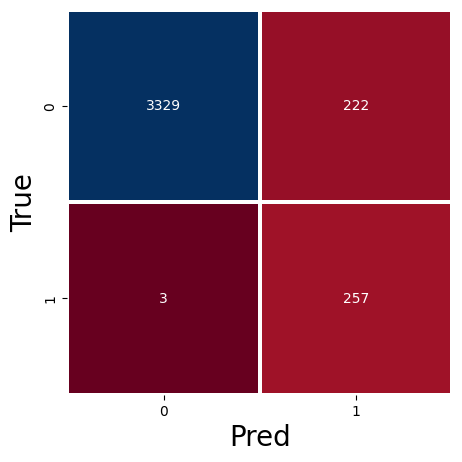

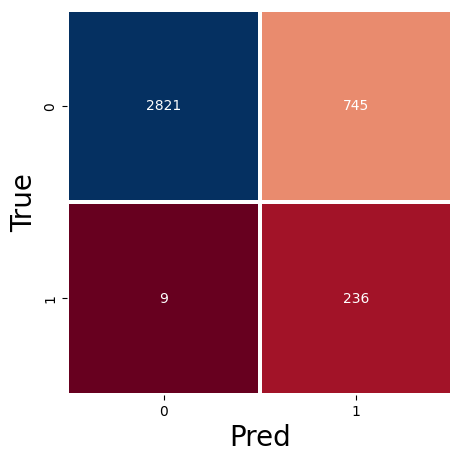

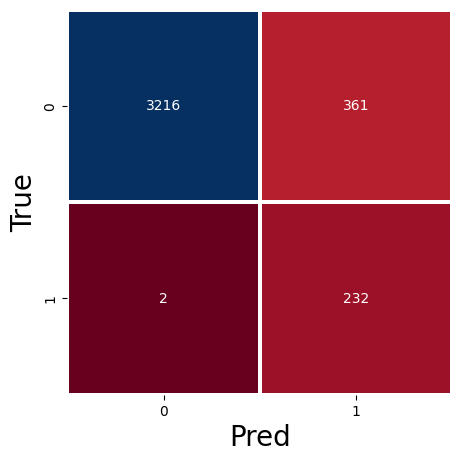

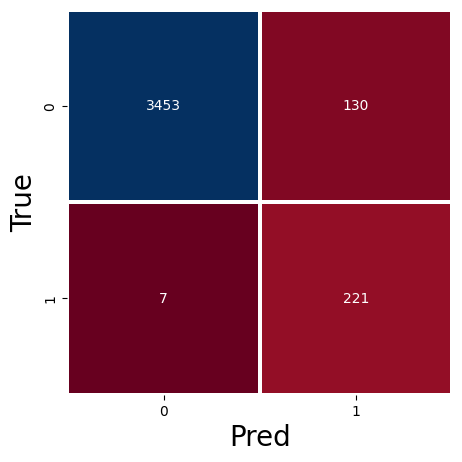

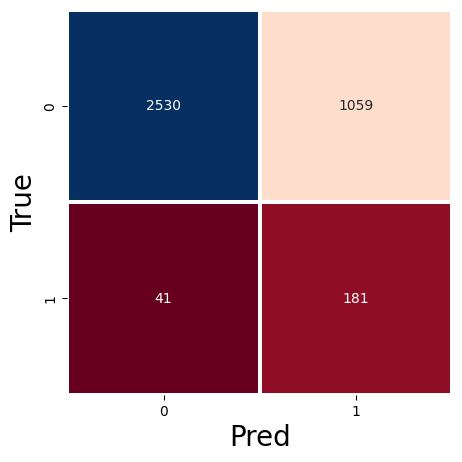

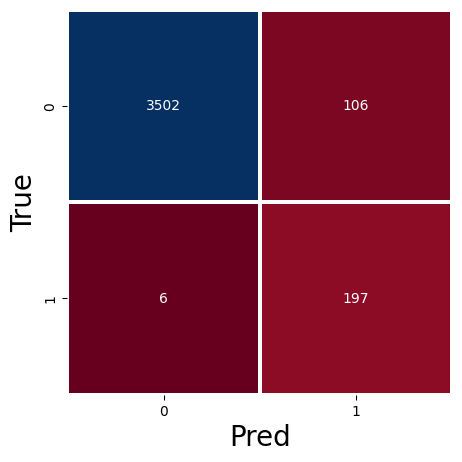

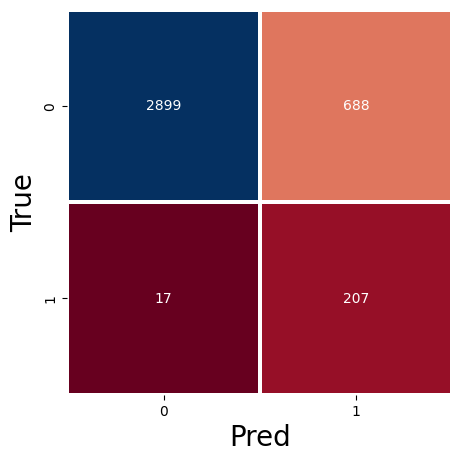

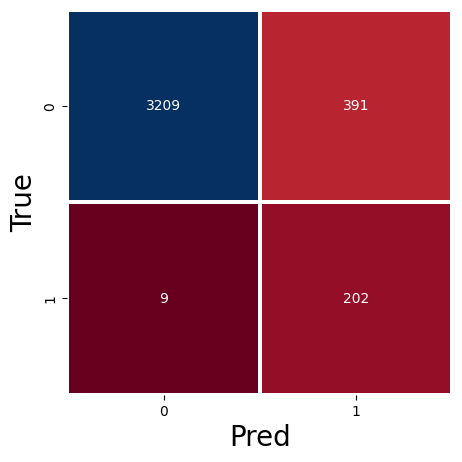

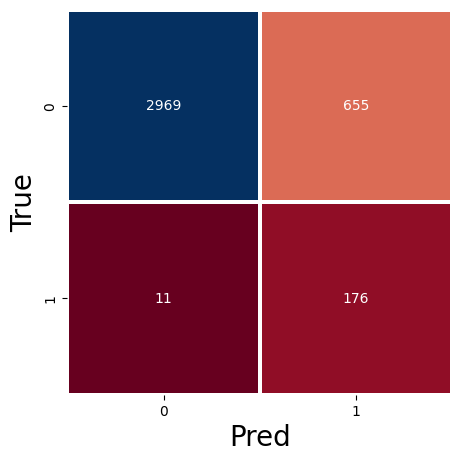

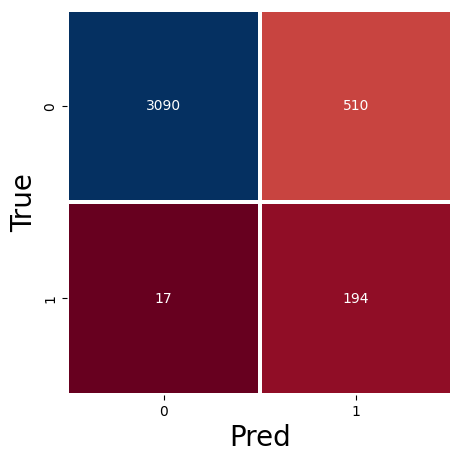

KeyboardInterrupt: 

In [44]:
precisionList = []
accList = []
accList1 = []
tprList = []
farList = []
frrList = []
for df in dfList:
    X = df.drop(columns=['label'])
    X = X.drop(columns=['pressureMedian'])
    X = X.drop(columns=['sizeMedian'])
    y = df['label']

    y_pred, y_test, accuracy_list = evaluate_model(X, y.astype('int'))
    accList.append(np.mean(accuracy_list))
    
    cm = confusion_matrix(y_test.astype('int'), y_pred)
    plt.figure(figsize=(12,5))
    sns.heatmap(cm,square=True,annot=True,fmt='d',linecolor='white',cmap='RdBu',linewidths=1.5,cbar=False)
    plt.xlabel('Pred',fontsize=20)
    plt.ylabel('True',fontsize=20)
    plt.show()
    
    tn, fp, fn, tp = cm.ravel()
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    accList1.append(accuracy)
print(np.mean(accList))
print(np.mean(accList1))
   
    